# Tabular Playground Series - Jul 2021

In [14]:
# Required modules

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from zipfile import ZipFile
from matplotlib import pyplot as plt

In [6]:
# Config

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 7)

In [7]:
# Extracting the data

with ZipFile('/content/tabular-playground-series-jul-2021.zip', 'r') as zf:
    zf.extractall('./')

In [16]:
# Load the train data

train = pd.read_csv('train.csv', parse_dates=['date_time'])
train.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


In [17]:
# Inspecting the data

train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7111 entries, 0 to 7110
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date_time               7111 non-null   datetime64[ns]
 1   deg_C                   7111 non-null   float64       
 2   relative_humidity       7111 non-null   float64       
 3   absolute_humidity       7111 non-null   float64       
 4   sensor_1                7111 non-null   float64       
 5   sensor_2                7111 non-null   float64       
 6   sensor_3                7111 non-null   float64       
 7   sensor_4                7111 non-null   float64       
 8   sensor_5                7111 non-null   float64       
 9   target_carbon_monoxide  7111 non-null   float64       
 10  target_benzene          7111 non-null   float64       
 11  target_nitrogen_oxides  7111 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
count,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000
mean,20.878034,47.561004,1.110309,1091.572100,938.064970,883.903305,1513.238349,998.335565,2.086219,10.237083,204.066784
std,7.937917,17.398731,0.398950,218.537554,281.978988,310.456355,350.180310,381.537695,1.447109,7.694426,193.927723
min,1.300000,8.900000,0.198800,620.300000,364.000000,310.600000,552.900000,242.700000,0.100000,0.100000,1.900000
25%,14.900000,33.700000,0.855900,930.250000,734.900000,681.050000,1320.350000,722.850000,1.000000,4.500000,76.450000
50%,20.700000,47.300000,1.083500,1060.500000,914.200000,827.800000,1513.100000,928.700000,1.700000,8.500000,141.000000
75%,25.800000,60.800000,1.404150,1215.800000,1124.100000,1008.850000,1720.400000,1224.700000,2.800000,14.200000,260.000000
max,46.100000,90.800000,2.231000,2088.300000,2302.600000,2567.400000,2913.800000,2594.600000,12.500000,63.700000,1472.300000


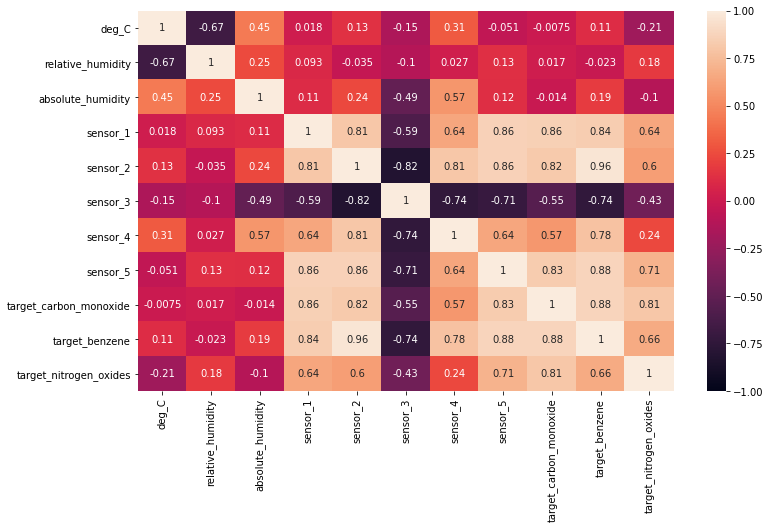

In [13]:
# Correlation matrix

sns.heatmap(train.corr(), annot=True, vmin=-1, vmax=1)

In [24]:
# Separating out features and labels

X = train.drop(['date_time', 'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'], axis=1)
y = train[['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']]

## ML Part

In [18]:
# Model Definition

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='linear'),
])

In [19]:
# Custom metrics

def rmse(y_true, y_pred):
    return tf.math.sqrt(tf.keras.losses.mean_squared_error(y_true, y_pred))

In [20]:
# Compiling the model

optim = tf.keras.optimizers.Adam()
loss = tf.keras.losses.mean_squared_error

model.compile(optimizer=optim, loss=loss, metrics=[rmse])

In [26]:
# Model fitting

epochs = 5000
batch_size = 32

model.fit(X, y, validation_split=0.2, epochs=epochs, batch_size=batch_size)

Streaming output truncated to the last 5000 lines.
Epoch 2501/5000
178/178 [==============================] - 1s 3ms/step - loss: 594.1405 - rmse: 16.0974 - val_loss: 19753.7832 - val_rmse: 92.3026
Epoch 2502/5000
178/178 [==============================] - 1s 3ms/step - loss: 590.8179 - rmse: 16.1064 - val_loss: 17996.1074 - val_rmse: 85.4389
Epoch 2503/5000
178/178 [==============================] - 1s 3ms/step - loss: 592.7595 - rmse: 16.0881 - val_loss: 17575.9727 - val_rmse: 84.1538
Epoch 2504/5000
178/178 [==============================] - 1s 4ms/step - loss: 631.5649 - rmse: 16.4415 - val_loss: 16666.0742 - val_rmse: 81.5562
Epoch 2505/5000
178/178 [==============================] - 1s 3ms/step - loss: 590.2360 - rmse: 15.9856 - val_loss: 17871.2500 - val_rmse: 87.0160
Epoch 2506/5000
178/178 [==============================] - 1s 3ms/step - loss: 598.1171 - rmse: 16.0979 - val_loss: 17113.3652 - val_rmse: 82.4152
Epoch 2507/5000
178/178 [==============================] - 1s 3ms/s

In [27]:
# Load test data

test = pd.read_csv('test.csv', parse_dates=['date_time'])
test.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,2011-01-01 00:00:00,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1
1,2011-01-01 01:00:00,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0
2,2011-01-01 02:00:00,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8
3,2011-01-01 03:00:00,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0
4,2011-01-01 04:00:00,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3


In [28]:
# Predictioin

test_pred = model.predict(test.drop(['date_time'], axis=1))
test_pred

array([[ -0.9016358, -36.639023 , 135.89703  ],
       [ -1.9063028, -60.05618  , 217.13809  ],
       [ -1.0551206, -37.524185 , 137.83792  ],
       ...,
       [  2.3066688,  12.340272 , -19.313366 ],
       [  2.4389665,   9.636826 , -26.88441  ],
       [  2.5361426,   9.447195 , -33.207623 ]], dtype=float32)

In [41]:
# Output

submission = pd.DataFrame(test_pred)
submission['date_time'] = test['date_time'].values
submission.columns = ['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides', 'date_time']
submission.to_csv('output.csv', index=False)